In [91]:
import os
import json
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BOND_FILES = ['government_investment_issues.json', 'malaysian_government_securities.json', 'short_terms_bills.json']

# Loading Data

In [3]:
bond_dict = dict()
for filename in BOND_FILES:
    with open(f'../data/investment_vehicles/{filename}', 'r') as f:
        bond_dict[filename.replace('.json', '')] = pd.DataFrame.from_dict(json.loads(f.read())['data'])


gov_issues_df = bond_dict['government_investment_issues']
gov_issues_df['trading_date'] = pd.to_datetime(gov_issues_df['trading_date'])
gov_issues_df = gov_issues_df.astype({
    'maturity_month': int,
    'maturity_year':int,
    'tra_yie_low': float,
    'tra_yie_high': float,
    'tra_yie_close': float,
    'tot_vol': float,
    'daily_change': float
})

# Remove days where yield of bonds is 0% and sort by trading date and tenure
gov_issues_df = (
    gov_issues_df[
        (gov_issues_df['tra_yie_close'] != 0)
        & (gov_issues_df['tra_yie_close'] != 0)
        & (gov_issues_df['tra_yie_close'] != 0)
    ].reset_index(drop=True)
    .assign(**{'sort_col': gov_issues_df['trading_date'].astype(int) / 10**10 + gov_issues_df['tenure'].str[0:-1].astype(int)})
    .sort_values(by='sort_col', ascending=True)
    .drop('sort_col', axis=1)
)

gov_sec_df = bond_dict['malaysian_government_securities']
gov_sec_df['trading_date'] = pd.to_datetime(gov_sec_df['trading_date'])
gov_sec_df = gov_sec_df.astype({
    'maturity_month': int,
    'maturity_year':int,
    'coupon': float,
    'tra_yie_low': float,
    'tra_yie_high': float,
    'tra_yie_close': float,
    'tot_vol': float,
    'daily_change': float
})

# Remove days where yield of securities is 0% and sort by trading date and tenure
gov_sec_df = (
    gov_sec_df[
        (gov_sec_df['tra_yie_close'] != 0)
        & (gov_sec_df['tra_yie_close'] != 0)
        & (gov_sec_df['tra_yie_close'] != 0)
    ].reset_index(drop=True)
    .assign(**{'sort_col': gov_issues_df['trading_date'].astype(int) / 10**10 + gov_issues_df['tenure'].str[0:-1].astype(int)})
    .sort_values(by='sort_col', ascending=True)
    .drop('sort_col', axis=1)
)


gov_bills_df = bond_dict['short_terms_bills']

# Understanding Terms

## Government Investment Issues

<u>daily_change</u>
- change in the trading yield close from day to day

<u>maturity_month</u>
- The month of the issue's maturity date

<u>maturity_year</u>
- The year of the issue's maturity date

<u>tenure</u>
- The duration of the bond in years

<u>tot_vol</u>
- Total volume of bond sales in Millions of Ringgit

<u>tra_yie_close</u>
- The trading yield at market closing

<u>tra_yie_high</u>
- The highest daily trading yield

<u>tra_yie_low</u>
- The lowest daily trading yield

<u>trading_date</u>
- Date when the row data was collected

# Plots

## Government Investment Issues

### Historical Prices

,trading_date,tenure,maturity_month,maturity_year,tra_yie_low,tra_yie_high,tra_yie_close,tot_vol,daily_change,securities_type
0,2006-09-29,5Y,7,2011,3.96,3.96,3.96,25.00,3.96,government_investment_issues
1,2006-10-02,5Y,7,2011,3.98,3.98,3.98,20.00,0.02,government_investment_issues
3,2006-10-04,3Y,4,2009,3.89,3.90,3.89,115.00,-0.01,government_investment_issues
4,2006-10-04,5Y,7,2011,3.94,3.95,3.94,110.00,0.00,government_investment_issues
2,2006-10-04,10Y,3,2015,4.16,4.16,4.16,5.00,4.16,government_investment_issues
...,...,...,...,...,...,...,...,...,...,...
11858,2025-04-24,3Y,7,2028,3.29,3.31,3.31,265.00,0.00,malaysian_government_securities
11859,2025-04-24,5Y,8,2030,3.42,3.44,3.42,189.00,-0.02,malaysian_government_securities
11855,2025-04-23,7Y,10,2031,3.50,3.56,3.56,436.08,0.00,malaysian_government_securities
11856,2025-04-24,10Y,11,2034,3.66,3.69,3.67,300.70,-0.01,malaysian_government_securities


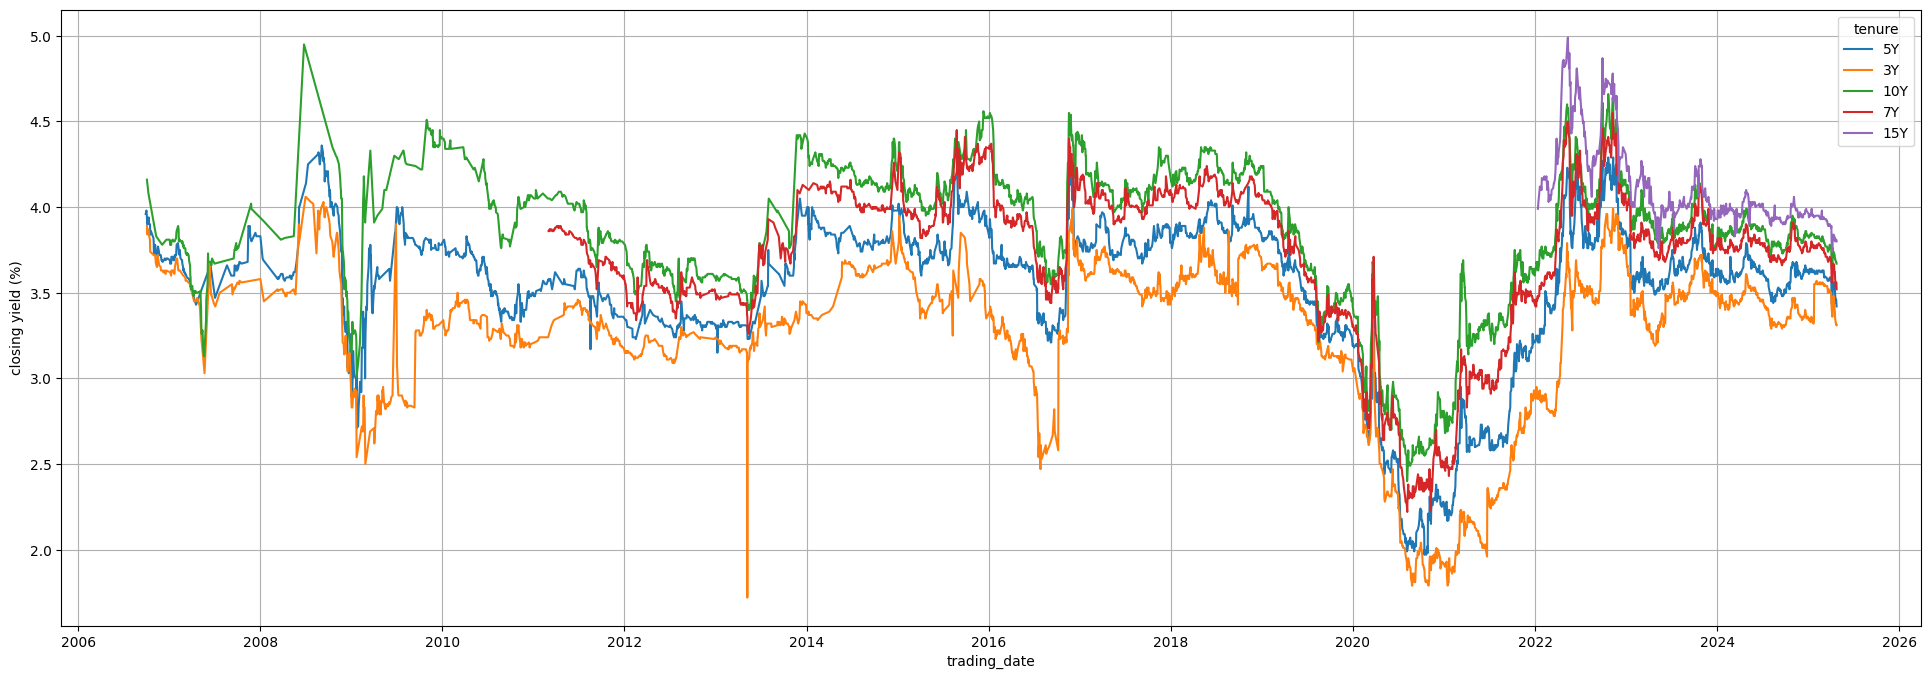

In [168]:
plot_df = gov_issues_df
# plot_df = gov_issues_df[
    # (gov_issues_df['tenure'] != None)
    # (gov_issues_df['tenure'] == '3Y')
    # & (gov_issues_df['trading_date'] < '2022-01-01')
# ]


display(plot_df)
plt.figure(figsize=(24, 8))
sns.lineplot(plot_df, x='trading_date', y='tra_yie_close', hue='tenure')
plt.ylabel('closing yield (%)')
plt.grid(True);

### Investigating 2013 anomalous price drop

The cause of the drop might be due to the 2013 Malaysian election protests over the outcome of the GE13 results [[1]](https://www.bbc.com/news/world-asia-22445435) [[2]](https://www.reuters.com/article/world/malaysian-rally-to-protest-election-fraud-draws-big-crowd-idUSBRE9470SF/)

In [5]:
gov_issues_df[
    (gov_issues_df['tenure'] == '3Y')
    & (gov_issues_df['trading_date']
       .isin(pd.date_range(
            pd.to_datetime('2013-05-08')-pd.to_timedelta('7D'),
            pd.to_datetime('2013-05-08')+pd.to_timedelta('7D')
    )))
]

,trading_date,tenure,maturity_month,maturity_year,tra_yie_low,tra_yie_high,tra_yie_close,tot_vol,daily_change,securities_type
2379,2013-05-02,3Y,2,2016,3.17,3.17,3.17,30.0,0.00,government_investment_issues
2381,2013-05-03,3Y,2,2016,3.17,3.17,3.17,310.0,0.00,government_investment_issues
2385,2013-05-06,3Y,2,2016,3.14,3.16,3.15,320.0,-0.02,government_investment_issues
2388,2013-05-07,3Y,2,2016,3.14,3.15,3.15,395.0,0.00,government_investment_issues
2392,2013-05-08,3Y,2,2016,1.72,3.15,1.72,208.5,-1.43,government_investment_issues
2396,2013-05-09,3Y,2,2016,3.10,3.15,3.10,628.0,1.38,government_investment_issues
2400,2013-05-10,3Y,2,2016,3.10,3.12,3.10,470.0,0.00,government_investment_issues
2404,2013-05-13,3Y,2,2016,3.11,3.14,3.12,325.0,0.02,government_investment_issues
2407,2013-05-14,3Y,2,2016,3.10,3.13,3.11,340.0,-0.01,government_investment_issues
2410,2013-05-15,3Y,2,2016,3.12,3.12,3.12,40.0,0.01,government_investment_issues


### Yield Curve

During the Covid-19 pandemic the yield curve for government investment issues did not invert. Instead, the curve seems to have gotten steeper despite the sharp decline in 2020.

Bond yield rebounded by 2022 and even exceeded 2019 yields for all tenures in Q2,3 & 4.

Additional Reading:
1. Reserve Bank of Australia [[src]](https://www.rba.gov.au/education/resources/explainers/bonds-and-the-yield-curve.html)

#### 2019-2020

### Logarithmic monthly trading volumes for securities issues

Monthly trade volumes increased slightly over a 20 year period with large monthly swings that almost overwhelm the observable trend.

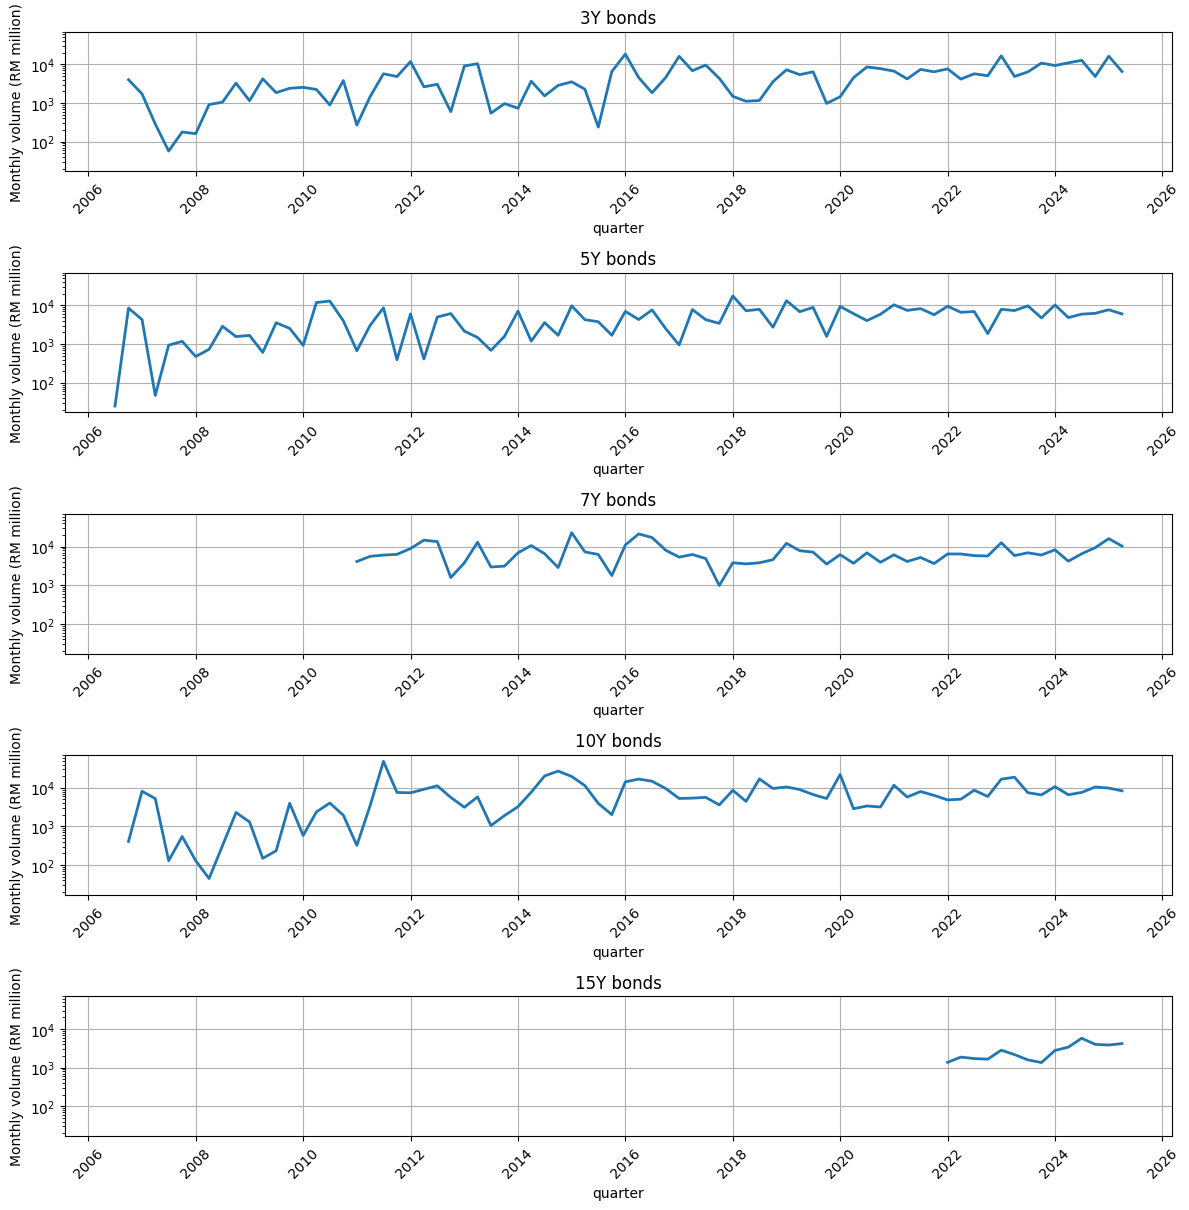

In [194]:
plot_df = (
    gov_issues_df
    .assign(**{
        'quarter': gov_issues_df['trading_date'].dt.to_period('Q').dt.to_timestamp(),
        'sort_col': gov_issues_df['trading_date'].dt.to_period('Q').astype(int) + gov_issues_df['tenure'].str[0:-1].astype(int) * 1000
    })
    .groupby(['tenure', 'quarter'])
    .agg({'trading_date': 'min', 'tot_vol': 'sum', 'sort_col': 'max'})
    .sort_values('sort_col', ascending=True)
    .drop('sort_col', axis=1)
    .reset_index()
)

old_ax = None
tenure_list = plot_df['tenure'].unique()
rows = len(tenure_list)

plt.figure(figsize=(12, 12))
for idx, tenure in enumerate(tenure_list):
    subplot_df = plot_df[plot_df['tenure'] == tenure]
    ax = plt.subplot2grid((rows, 1), (idx, 0), sharey=old_ax, sharex=old_ax)
    old_ax = ax
    sns.lineplot(subplot_df, x='quarter', y='tot_vol', linewidth=2)
    plt.yscale('log')
    plt.ylabel('Monthly volume (RM million)')
    plt.title(f'{tenure} bonds')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.grid(True);


## Malaysian Government Securities - Historical Prices

,trading_date,tenure,maturity_month,maturity_year,coupon,tra_yie_low,tra_yie_high,tra_yie_close,tot_vol,daily_change,securities_type
0,2006-09-29,10Y,9,2016,4.262,4.16,4.17,4.17,560.00,4.17,malaysian_government_securities
1,2006-09-29,3Y,3,2009,7.000,3.92,3.95,3.93,117.31,3.93,malaysian_government_securities
3,2006-10-02,10Y,9,2016,4.262,4.17,4.18,4.18,107.00,0.01,malaysian_government_securities
4,2006-10-02,3Y,3,2009,7.000,3.92,3.94,3.94,45.00,0.01,malaysian_government_securities
2,2006-09-29,5Y,4,2011,3.756,3.92,3.95,3.95,43.40,3.95,malaysian_government_securities
...,...,...,...,...,...,...,...,...,...,...,...
19104,2025-04-24,20Y,5,2044,4.180,3.91,3.91,3.91,1.45,-0.01,malaysian_government_securities
19105,2025-04-24,30Y,3,2053,4.457,4.04,4.09,4.05,102.43,-0.01,malaysian_government_securities
19106,2025-04-24,3Y,4,2028,3.519,3.26,3.28,3.27,149.82,-0.02,malaysian_government_securities
19107,2025-04-24,5Y,8,2029,3.885,3.36,3.39,3.37,503.23,-0.02,malaysian_government_securities


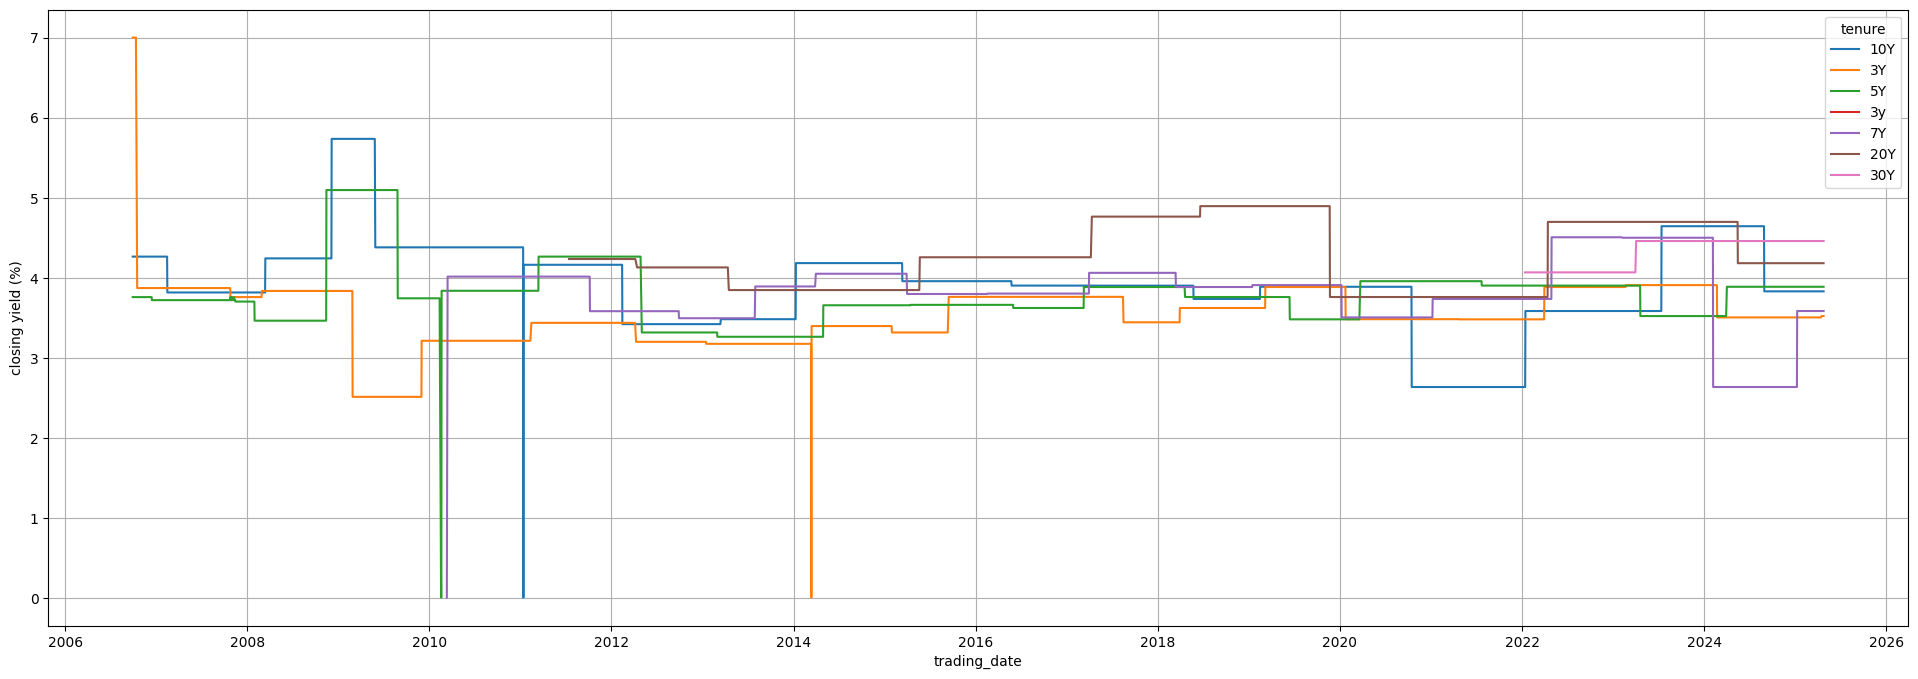

In [166]:
plot_df = gov_sec_df
# plot_df = gov_sec_df[
    # (gov_sec_df['tenure'] != None)
    # (gov_sec_df['tenure'] == '3Y')
    # & (gov_sec_df['trading_date'] < '2022-01-01')
# ]


display(plot_df)
plt.figure(figsize=(24, 8))
sns.lineplot(plot_df, x='trading_date', y='coupon', hue='tenure')
plt.ylabel('closing yield (%)')
plt.grid(True);